**<h1>Movies Recommender System<br>**
FINAL PROJECT CODE<br>
STA-6704<br>
Anwesh Praharaj</h1>

## Index

    1. Loading Library
    2. Loading Dataset
    3. Statistical Analysis
        3.1. Shape of dataset
        3.2. Descriptive statistics
        3.3. Missing values
        3.4. Duplicate Values
    4. Exploratory Data Analysis(EDA)
    5. Custom Functions
    6. Content based filtering
    7. Collaborative Filtering
        7.1. Memory based collaborative filtering
             7.1.1. User-Item Filtering
             7.1.2. Item-Item Filtering
        7.2. Model based collaborative filtering
             7.2.1. Single Value Decomposition(SVD)
             7.2.2. Evaluating Collaborative Filtering using SVD
             7.2.3. Hybrid Model

## 1. Loading Library

In [79]:
from math import sqrt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from scipy.sparse.linalg import svds
# Import libraries from Surprise package
from surprise import SVD,Reader, Dataset
from surprise import Dataset
from surprise.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from surprise.model_selection import train_test_split
from sklearn.cluster import KMeans
from wordcloud import WordCloud 
from sklearn.metrics.pairwise import cosine_similarity

## 2. Loading Data

In [228]:
# Reading ratings file
ratings_df = pd.read_csv('C:/Users/anwes/OneDrive/Documents/UCF_Summer_2021/STS/Final_Project/ml-100k/u.data', 
                      sep='\t', header=None , encoding='latin-1',names=['user_id','movie_id','rating','timestamp'])

# Reading movies file
movies_df = pd.read_csv('C:/Users/anwes/OneDrive/Documents/UCF_Summer_2021/STS/Final_Project/ml-100k/u.item'
                     , sep='|', encoding='latin-1',header=None,names=['movie_id','movie_title','release_date','video_release_date',
              'IMDb_URL','genre_unknown','genre_Action','genre_Adventure',
              'genre_Animation','genre_Childrens','genre_Comedy','genre_Crime',
              'genre_Documentary','genre_Drama','genre_Fantasy','genre_FilmNoir',
              'genre_Horror','genre_Musical','genre_Mystery','genre_Romance',
              'genre_SciFi','genre_Thriller','genre_War','genre_Western'])

# Reading movie file with data preparation
data_movies = pd.read_csv('C:/Users/anwes/OneDrive/Documents/UCF_Summer_2021/STS/Final_Project/ml-100k/data_movies.csv', encoding='latin-1')

In [229]:
ratings_df

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [230]:
movies_df

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,genre_unknown,genre_Action,genre_Adventure,genre_Animation,genre_Childrens,...,genre_Fantasy,genre_FilmNoir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_SciFi,genre_Thriller,genre_War,genre_Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
data_movies

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation | Childrens | Comedy
1,2,GoldenEye (1995),Action | Adventure | Thriller
2,3,Four Rooms (1995),Thriller
3,4,Get Shorty (1995),Action | Comedy | Drama
4,5,Copycat (1995),Crime | Drama | Thriller
...,...,...,...
1677,1678,Mat' i syn (1997),Drama
1678,1679,B. Monkey (1998),Romance | Thriller
1679,1680,Sliding Doors (1998),Drama | Romance
1680,1681,You So Crazy (1994),Comedy


## 3. Statistical Analysis

   ### 3.1. Shape of dataset

In [232]:
print(" Rating dataset: ( rows, columns) = ",ratings_df.shape)
print(" Movie dataset: ( rows, columns) = ",data_movies.shape)

 Rating dataset: ( rows, columns) =  (100000, 4)
 Movie dataset: ( rows, columns) =  (1682, 3)


### 3.2. Descriptive statistics

In [233]:
ratings_df.describe(include='all')

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [234]:
data_movies.describe(include='all')

,movie_id,movie_title,genre
count,1682.000000,1682,1682
unique,NaN,1664,216
top,NaN,Chairman of the Board (1998),Drama
freq,NaN,2,376
mean,841.500000,NaN,NaN
std,485.695893,NaN,NaN
min,1.000000,NaN,NaN
25%,421.250000,NaN,NaN
50%,841.500000,NaN,NaN
75%,1261.750000,NaN,NaN


### 3.3 Missing Value

In [235]:
ratings_df.isnull().any()

user_id      False
movie_id     False
rating       False
timestamp    False
dtype: bool

In [236]:
data_movies.isnull().any()

movie_id       False
movie_title    False
genre          False
dtype: bool

### 3.4. Duplicate Entry

In [237]:
df_tmp=data_movies[data_movies.duplicated(subset = 'movie_title', keep = False)]
lis1=[]
lis2=[]
for j in range(32):
    x=0
    for i in range(31):
        if df_tmp.iloc[j,1]== df_tmp.iloc[i+1,1]:
            if df_tmp.iloc[j,2]== df_tmp.iloc[i+1,2]:
                x+=1
                if x>1:
#                 print(j, i)
                    lis1.append(df_tmp.iloc[j,1])
                else:
                    lis2.append(df_tmp.iloc[j,1])
                    
print('List of dublicate movies with same genres {}'.format(list(set(lis1))))
print('')
print('List of dublicate movies with different genres {}'.format(list(set(lis2)-set(lis1))))

List of dublicate movies with same genres ['That Darn Cat! (1997)', 'Hugo Pool (1997)', 'Hurricane Streets (1998)', 'Nightwatch (1997)', 'Ice Storm, The (1997)', 'Kull the Conqueror (1997)', 'Desperate Measures (1998)', "Ulee's Gold (1997)", 'Money Talks (1997)', 'Deceiver (1997)', 'Designated Mourner, The (1997)', 'Fly Away Home (1996)', 'Body Snatchers (1993)']

List of dublicate movies with different genres ['Substance of Fire, The (1996)', 'Chairman of the Board (1998)', 'Sliding Doors (1998)', 'Butcher Boy, The (1998)', 'Chasing Amy (1997)']


            Deleting the duplicate movies with same genres

In [238]:
data_movies.drop_duplicates(subset='movie_title', inplace = True, keep= 'first')

In [239]:
data_movies[data_movies.duplicated(subset = 'movie_title', keep = False)]

,movie_id,movie_title,genre


## 4. Exploratory Data Analysis(EDA)

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

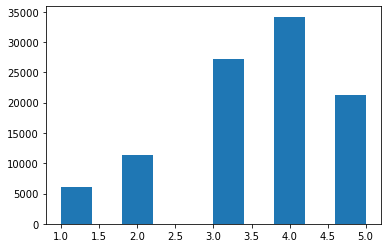

In [14]:
plt.hist(ratings_df['rating'])

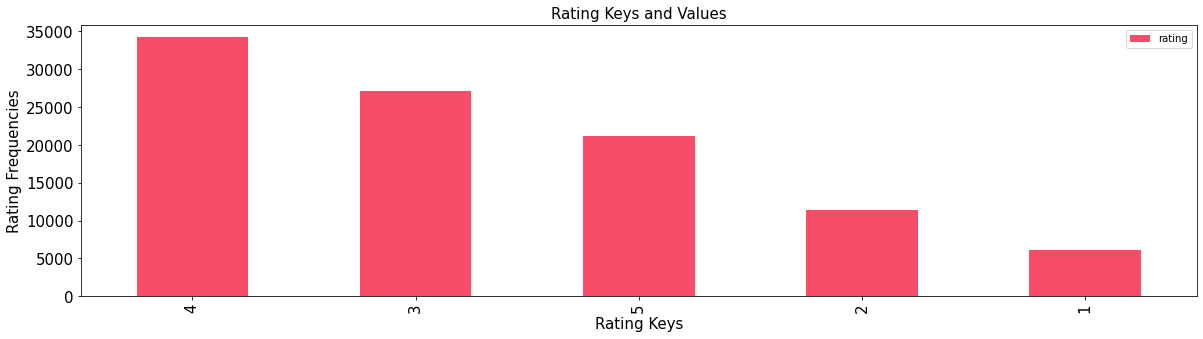

In [30]:
plt.figure(figsize=(20, 5))
ratings_df["rating"].value_counts().plot(kind="bar", color="#f74d69")
plt.xlabel("Rating Keys", fontsize=15)
plt.ylabel("Rating Frequencies", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Rating Keys and Values", fontsize=15)
plt.legend()
plt.show()

    Most of the user user provided the rating 4.0

<BarContainer object of 64 artists>

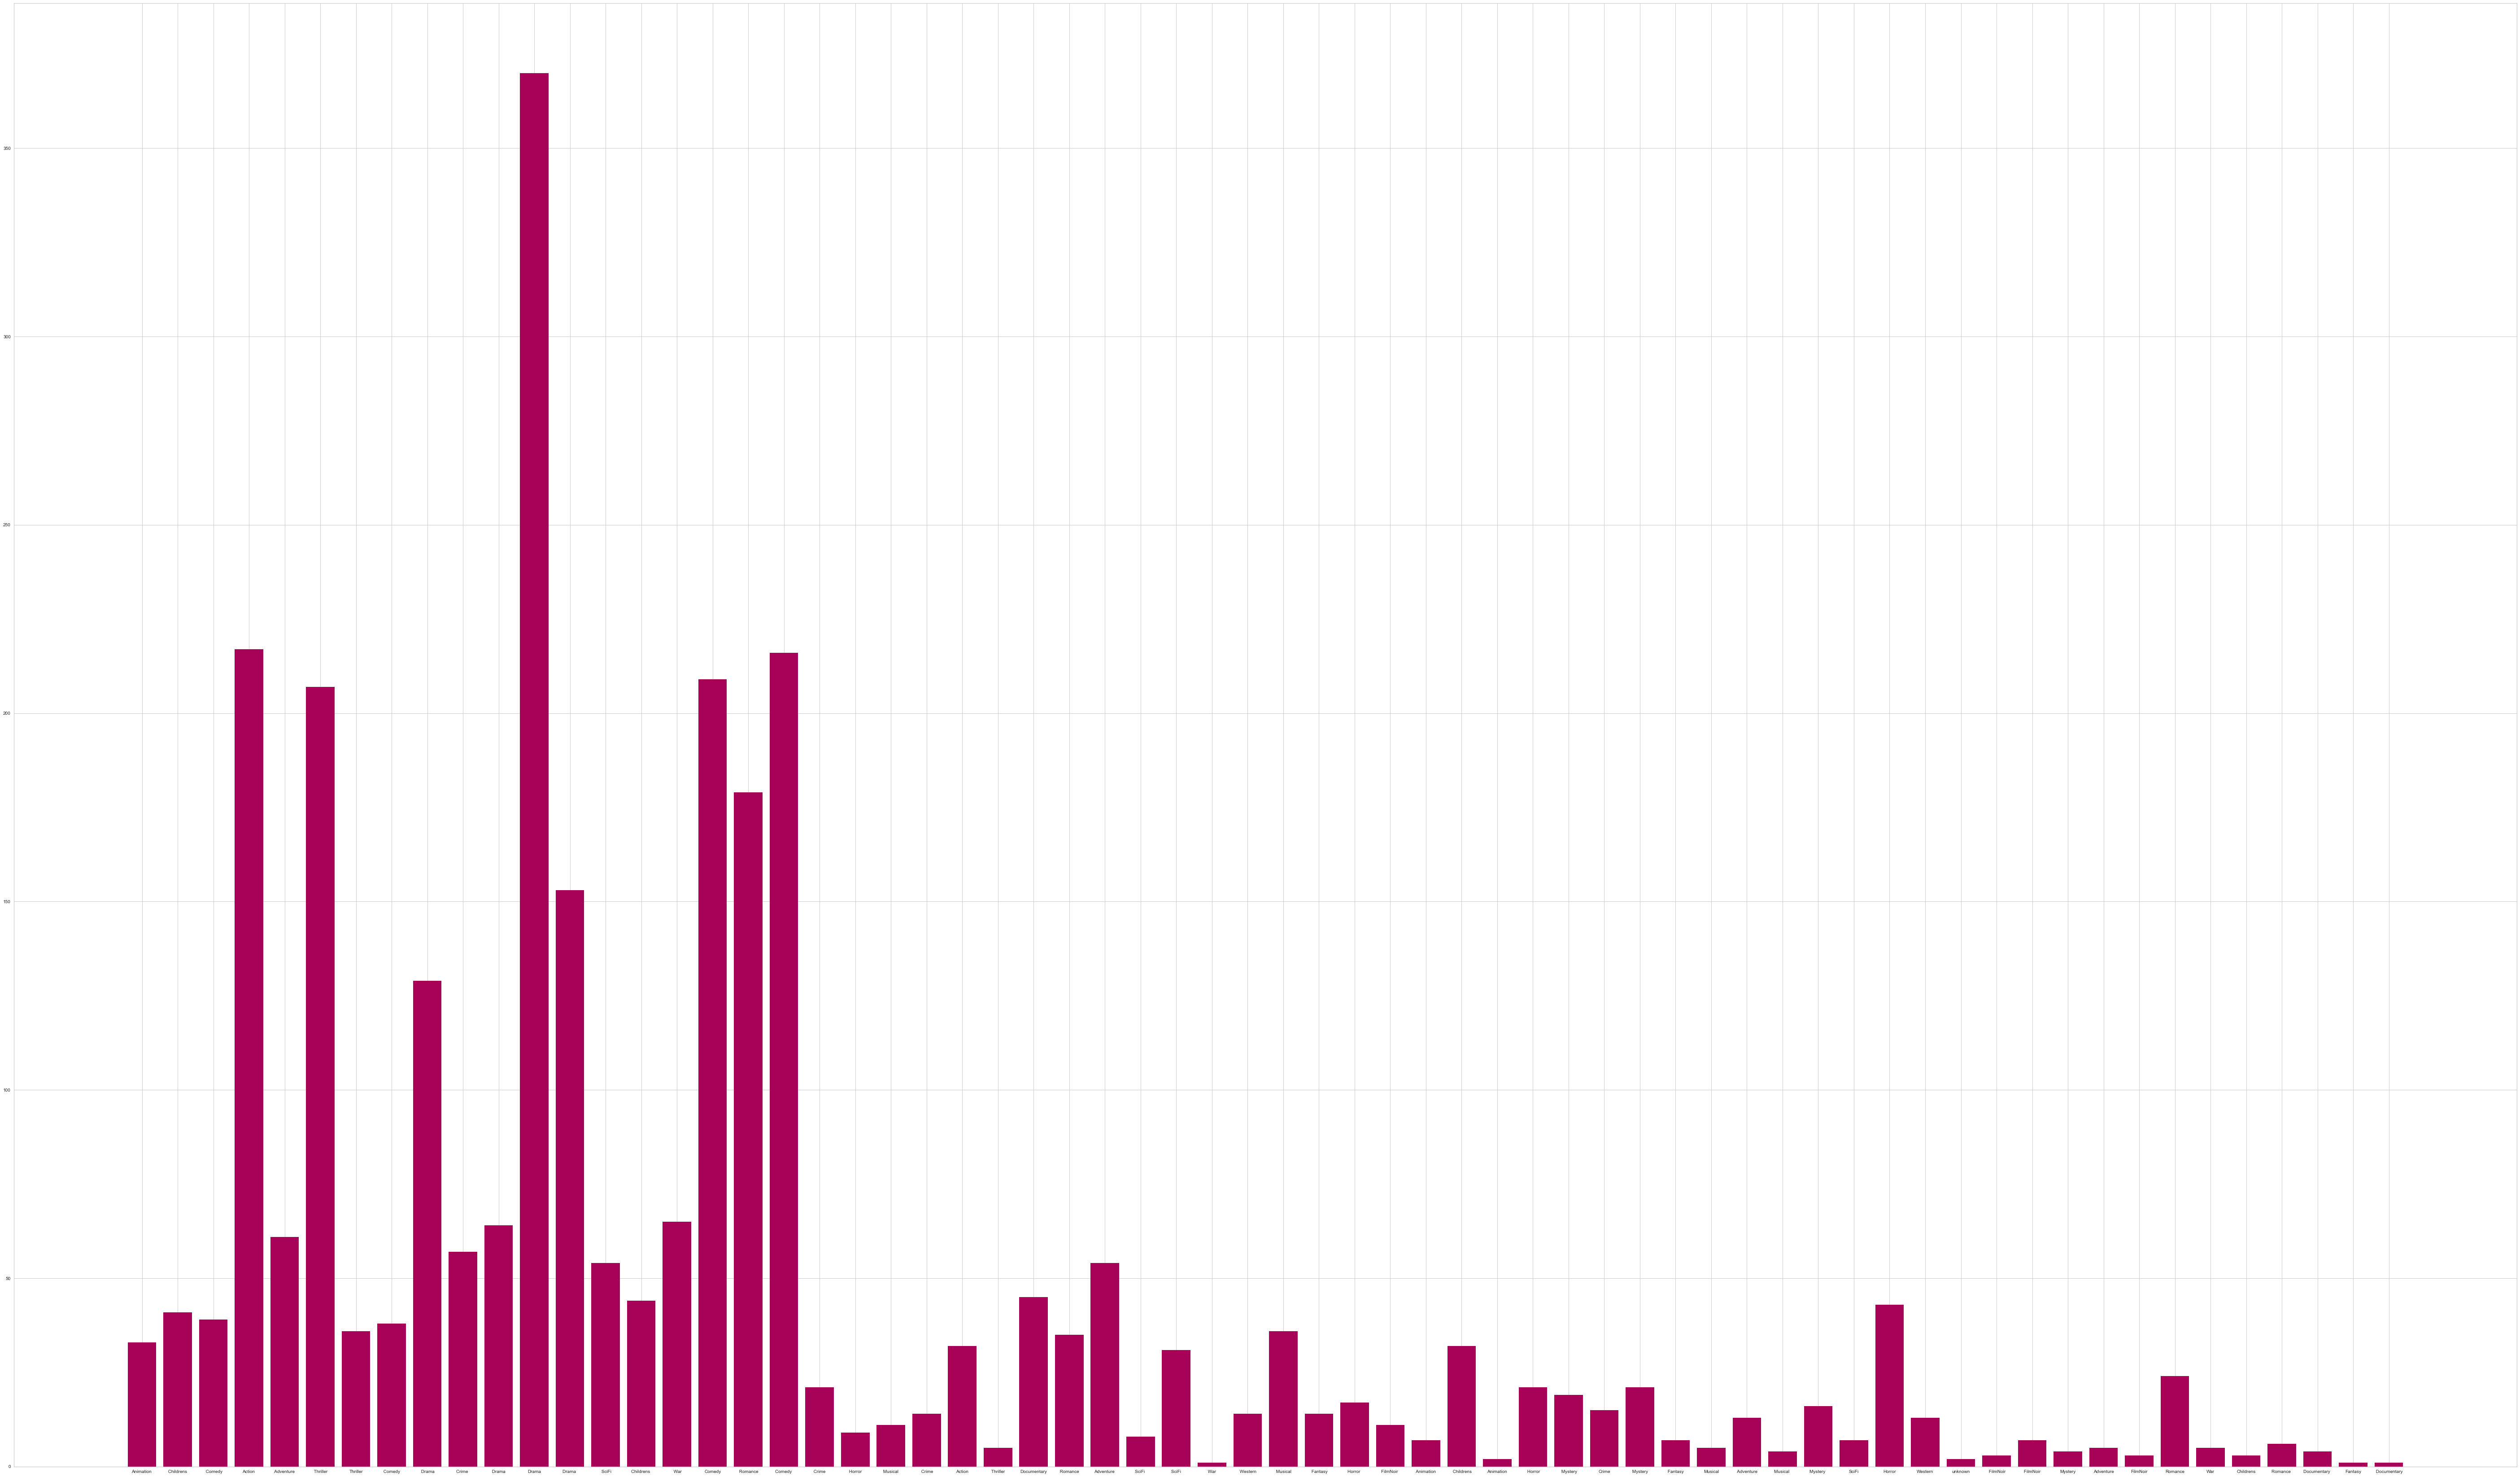

In [226]:
plt.figure(figsize=(100,60))
generlist = data_movies['genre'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
#geners_count.pop("(no genres listed)")

plt.bar(geners_count.keys(),geners_count.values(),color='m')

    Most popular genres of movie released

In [37]:
merge_ratings_movies = pd.merge(data_movies, ratings_df, on='movie_id', how='inner')
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)
ratings_grouped_by_users = merge_ratings_movies.groupby('user_id').agg([np.size, np.mean])
ratings_grouped_by_users = ratings_grouped_by_users.drop('movie_id', axis = 1)


In [44]:
ratings_grouped_by_users_df = pd.DataFrame(ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10))

<AxesSubplot:xlabel='user_id'>

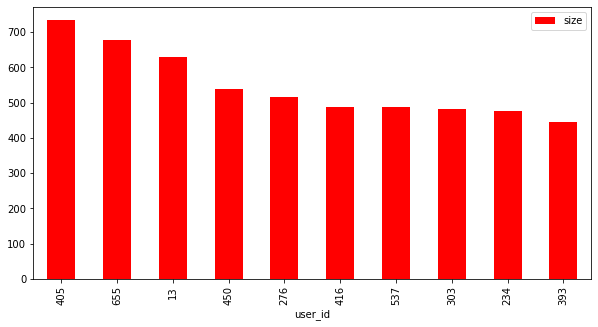

In [55]:
ratings_grouped_by_users_df.plot(kind="bar",figsize = (10,5), color = ['r', 'g', 'b', 'k', 'y', 'm', 'c'])

    Top 10 users who have rated most of the movies

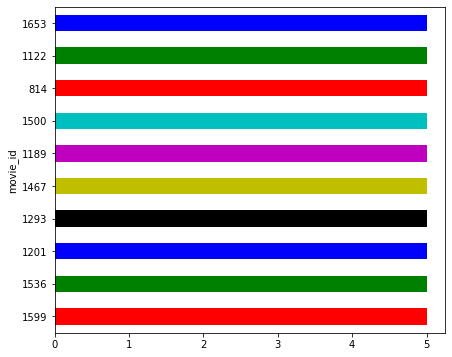

In [52]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movie_id').agg([np.mean], np.size)
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('user_id', axis=1)
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6), color = ['r', 'g', 'b', 'k', 'y', 'm', 'c']);

    Movies with high average rating

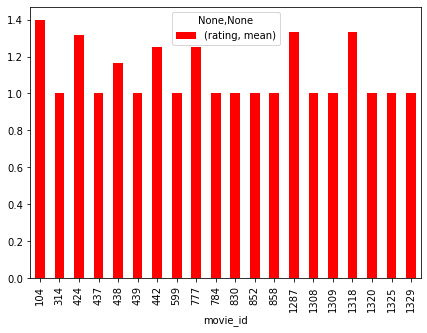

In [56]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='bar', figsize=(7,5),  color = ['r', 'g', 'b', 'k', 'y', 'm', 'c']);

    Movies with low average rating

In [58]:
New_data=pd.DataFrame(merge_ratings_movies.groupby(by='movie_title')['rating'].mean())
New_data['No. of people Rated']=merge_ratings_movies.groupby(by='movie_title')['rating'].count()

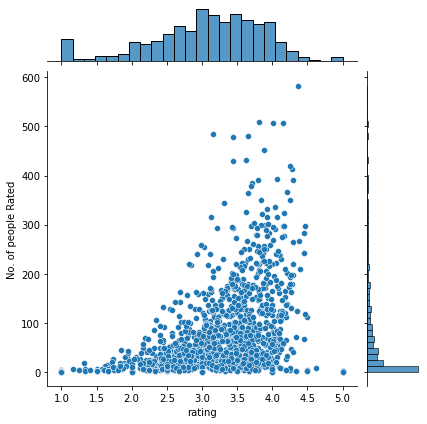

In [60]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated']);

This clearly shows that the Movies with ratings in the range of 3 to 4 has the most number of ratings. Movies with almost 5 star ratings has around 10 or 20 number of ratings to it. Lets just plot a Densityplot to have a look at the dense regions.

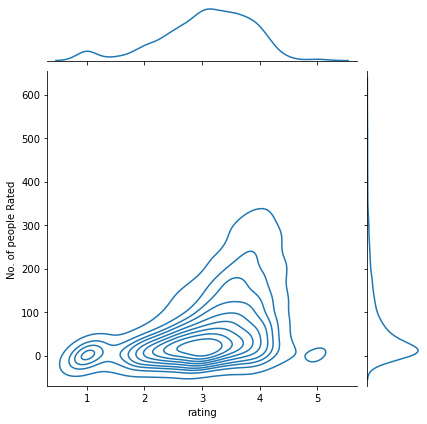

In [61]:
sns.jointplot(x=New_data['rating'],y=New_data['No. of people Rated'],kind='kde');

We can see the dark black zone in the plot which represent most no. of datapoints almost have 3 to 4 star ratings. Dark regions generally represent the Dense zones, which simply means alot of datapoints at that region.

C:\Users\anwes\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


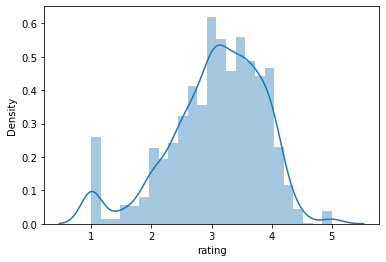

In [62]:
sns.distplot(New_data['rating']);

C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anwes\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='rating'>

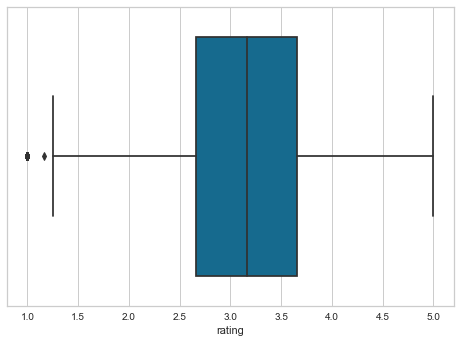

In [251]:
sns.boxplot(New_data['rating'], orient='v')

75% movies have rating less than around 3.25

<AxesSubplot:>

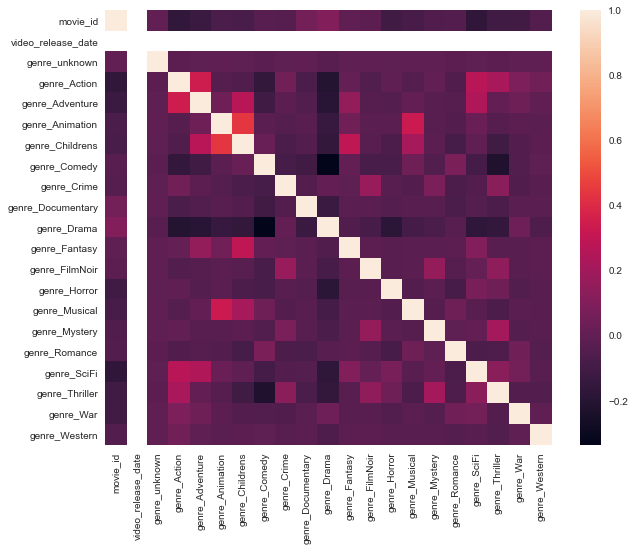

In [256]:
plt.figure(figsize = (10,8))
sns.heatmap(movies_df.corr(), annot=False)

## 5. Custom Functions

    
    Calculates top 2 movies to recommend based on given movie titles genres. 
    :param title: title of movie to be taken for base of recommendation
    :param cosine_sim_movies: cosine similarity between movies 
    :return: Titles of movies recommended to user


In [240]:
def CB_recommendations_on_genres(title, df):
    data_frame = df
    # Get the index of the movie that matches the title
    idx_movie = data_frame.loc[data_frame['movie_title'].isin([title])]
    idx_movie = idx_movie.index
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:6]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    # Return the top 2 most similar movies
    return data_frame['movie_title'].iloc[movie_indices]


    Calculates top movies to be recommended to user based on movie user has watched.  
    :param userId: userid of user
    :return: Titles of movies recommended to user

In [241]:
def CB_recommendation_on_content(userId):
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = ratings_df[ratings_df["user_id"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((data_movies["movie_title"][row["movie_id"]==data_movies["movie_id"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in recommendations_on_genres(movie[0],data_movies).iteritems():
            recommended_movie_list.append(movie_recommended)
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    return set(recommended_movie_list)

## 6. Content based filtering

* It simply helps you by identifying movies that are similar to the movies you like
* content-based recommendation systems are limited because they do not contain other user data. And it doesn’t help a user discover their potential tastes.
* For example, let’s say that user U1 and user U2 like Adevnture movies. User A also likes drama movies, but since you don’t have that knowledge, you keep offering Adventure movies. Eventually, this method eliminate other options that user U2 potentially might like.
* For this we need to have a minimal understanding of the users’ preferences, so that we can then recommend new items with similar tags/keywords to those specified (or inferred) by the user.

    We need to understand which genres really are relevant when it comes to defining a user’s like. have to find most popular genres

In [242]:
genre_popular = (data_movies.genre.str.split('|')
                      .explode()
                      .value_counts()
                      .sort_values(ascending=False))
genre_popular.head(10)

Drama        370
Action       217
Comedy       216
Comedy       209
 Thriller    207
 Romance     179
Drama        153
 Drama       129
 War          65
 Drama        64
Name: genre, dtype: int64

`Used wordCloud for more visual represenation

(-0.5, 999.5, 399.5, -0.5)

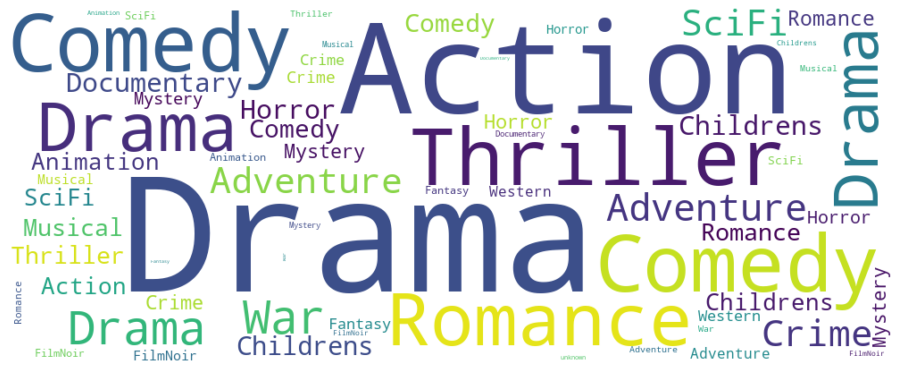

In [243]:
genre_wc = WordCloud(width=1000,height=400,background_color='white')
genre_wc.generate_from_frequencies(genre_popular.to_dict())
plt.figure(figsize=(16, 8))
plt.imshow(genre_wc, interpolation="bilinear")
plt.axis('off')

From above visualization, the most frequent genres are Drama, Comedy and Action. less frequent generes are Western, Fantasy , Sci-Fi. For our recomondation system we need to consider genres with less frequency 

As an example let’s consider a user who wants to find a movie similar to “The Good, the Bad and the Ugly”, which is a mixture of Western, Action and Adventure. Which genre do you think will be more relevant in terms of recommending a movie to this user? Presumably Western, since there will be many Action or Adventure movies, which are not Western, which could lead to recommending many none Western movies.

The contained based recomondation system is based on Movie
Here we use tf-idf vectorizer to build a vector representation of the data.

tf-idf will help capture the important genres of each movie by giving a higher weight to the less frequent genre.

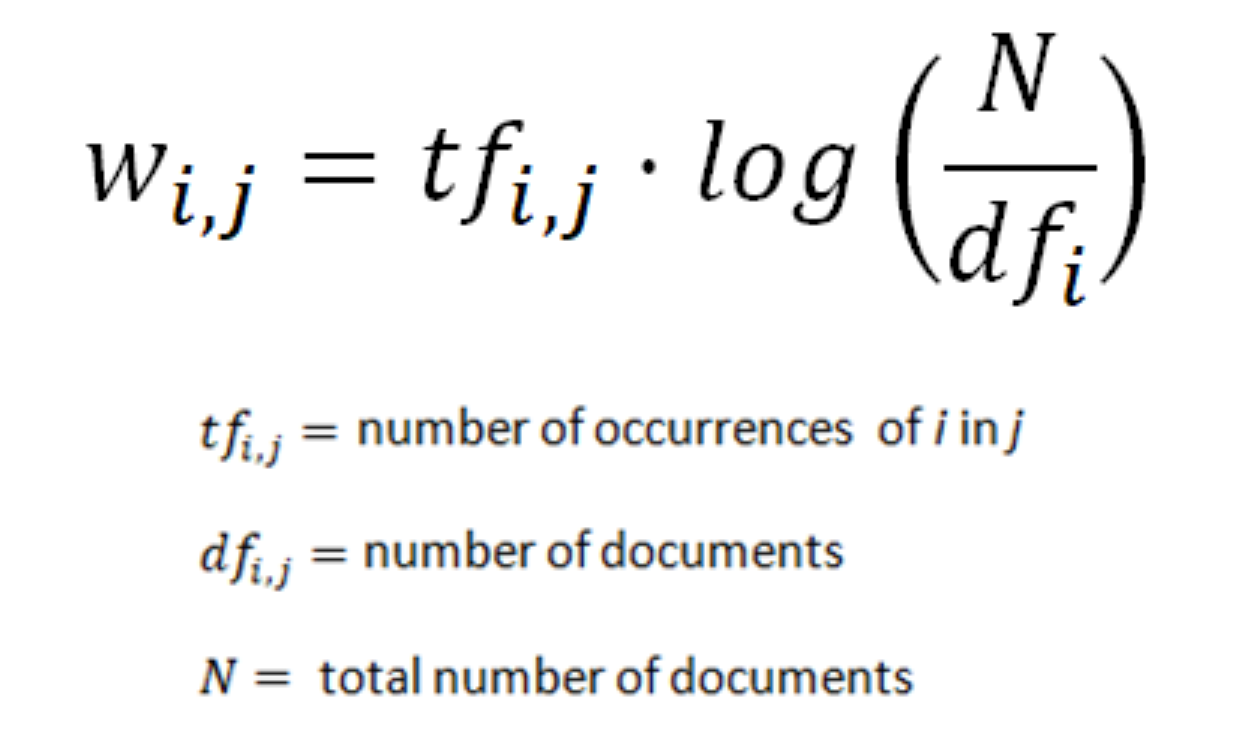

Next we have to find similiraty between the vector generated in previous step.The commonly used proximity measure algorithim is cosine similarity
The lower the angle between two vectors, the higher the cosine will be, hence yielding a higher similarity factor

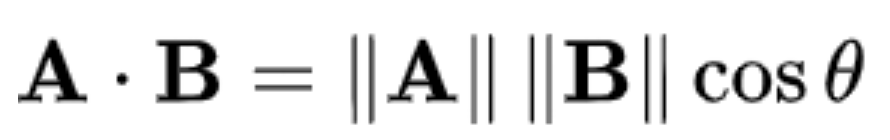

In [244]:
# Define a TF-IDF Vectorizer Object.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
data_movies['genre'] = data_movies['genre'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
movies_genres_matrix = tfidf_movies_genres.fit_transform(data_movies['genre'])

cosine_sim_movies = linear_kernel(movies_genres_matrix, movies_genres_matrix)
#cosine_sim_test = cosine_similarity(movies_genres_matrix)

In [245]:
movies_genres_matrix

<1664x19 sparse matrix of type '<class 'numpy.float64'>'
	with 2863 stored elements in Compressed Sparse Row format>

In [246]:
cosine_sim_movies

array([[1.        , 0.        , 0.        , ..., 0.        , 0.34901009,
        0.        ],
       [0.        , 1.        , 0.53681382, ..., 0.37852635, 0.        ,
        0.        ],
       [0.        , 0.53681382, 1.        , ..., 0.70513526, 0.        ,
        0.        ],
       ...,
       [0.        , 0.37852635, 0.70513526, ..., 1.        , 0.        ,
        0.        ],
       [0.34901009, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [252]:
CB_recommendations_on_genres("Birdcage, The (1996)", data_movies )

24                                 Birdcage, The (1996)
25                        Brothers McMullen, The (1995)
39    To Wong Foo, Thanks for Everything! Julie Newm...
40                                 Billy Madison (1995)
41                                        Clerks (1994)
Name: movie_title, dtype: object

In [248]:
CB_recommendation_on_content(20)

{'101 Dalmatians (1996)',
 'Absolute Power (1997)',
 'Adventures of Robin Hood, The (1938)',
 'Akira (1988)',
 'Aladdin and the King of Thieves (1996)',
 'Alice in Wonderland (1951)',
 'All Dogs Go to Heaven 2 (1996)',
 'Angels and Insects (1995)',
 "Antonia's Line (1995)",
 'Aristocats, The (1970)',
 'Backbeat (1993)',
 'Bad Taste (1987)',
 'Bananas (1971)',
 'Beavis and Butt-head Do America (1996)',
 'Belle de jour (1967)',
 'Blues Brothers 2000 (1998)',
 'Boot, Das (1981)',
 'Braindead (1992)',
 "Breakfast at Tiffany's (1961)",
 'Brother Minister: The Assassination of Malcolm X (1994)',
 'Canadian Bacon (1994)',
 'Carpool (1996)',
 'Chain Reaction (1996)',
 'Cinderella (1950)',
 'Clear and Present Danger (1994)',
 'Coneheads (1993)',
 'Crow, The (1994)',
 'D3: The Mighty Ducks (1996)',
 'Daylight (1996)',
 'Dead Man Walking (1995)',
 'Delicatessen (1991)',
 'Diabolique (1996)',
 'Dial M for Murder (1954)',
 'Die Hard 2 (1990)',
 'Disclosure (1994)',
 'Dolores Claiborne (1994)',
 'Do

    Evaluate content based model : Model Evaluation Using Knn Classifier

In [249]:
def get_movie_label(movie_id):
    classifier = KNeighborsClassifier(n_neighbors=5)
    x= movies_genres_matrix
    y = data_movies.iloc[:,-1]
    classifier.fit(x, y)
    y_pred = classifier.predict(movies_genres_matrix[movie_id])
    return y_pred

In [ ]:
true_count = 0
false_count = 0
def evaluate_content_based_model():
    for key, colums in data_movies.iterrows():
        movies_recommended_by_model = recommendations_on_genres(colums["movie_title"],data_movies)
        predicted_genres  = get_movie_label(movies_recommended_by_model.index)
        for predicted_genre in predicted_genres:
            global true_count, false_count
            if predicted_genre == colums["genre"]:
                true_count = true_count+1
            else:
                false_count = false_count +1
evaluate_content_based_model()
total = true_count + false_count
print("Hit:"+ str(true_count/total))
print("Fault:" + str(false_count/total))

## 7. Collaborative Filtering

Collaborative filtering uses various techniques to check people with similar interests and make recommendations based on shared interests.
Below are steps followeed by collaborative filtering: 

1. User Rating : A user rates movies to express the liking. Algo treats the ratings as an approximate representation of the user’s interest in movies
3. Similar User : Then it matches this user’s ratings with other users’ ratings and finds the people with the most similar ratings
4. Movie Recomondation : The system recommends items that the similar users have rated highly but not yet being rated by this user



Types of collaborative filtering techniques

* Memory based
        A memory-based system uses users’ rating data to compute the similarity between users or Movie.
* User-Item Filtering
        Step 1: Look for user who share the same rating patterns with the given user
        Step 2: Use the ratings from the user found in step 1 to calculate a prediction of a rating by the given user on a movie
* Item-Item Filtering
        Step 1: Build an item-item matrix of the rating relationships between pairs of items
        Step 2: Predict the rating of the current user on a product by examining the matrix and matching that user’s rating data
* Model based
        we develop models using different machine learning algorithms to predict users’ rating of unrated items [5]. There are many model-based collaborative filtering algorithms such as Matrix factorization algorithms (e.g., singular value decomposition (SVD), Alternating Least Squares (ALS) algorithm [8]), Bayesian networks, clustering models, etc
        
* Matrix Factorization
* Clustering
* Deep Learning

Item-Item Filtering 

In [118]:
df_movies_ratings=pd.merge(data_movies, ratings_df)

In [119]:
df_movies_ratings

,movie_id,movie_title,genre,user_id,rating,timestamp
0,1,Toy Story (1995),Animation | Childrens | Comedy,308,4,887736532
1,1,Toy Story (1995),Animation | Childrens | Comedy,287,5,875334088
2,1,Toy Story (1995),Animation | Childrens | Comedy,148,4,877019411
3,1,Toy Story (1995),Animation | Childrens | Comedy,280,4,891700426
4,1,Toy Story (1995),Animation | Childrens | Comedy,66,3,883601324
...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),Drama,863,1,889289570
99996,1679,B. Monkey (1998),Romance | Thriller,863,3,889289491
99997,1680,Sliding Doors (1998),Drama | Romance,863,2,889289570
99998,1681,You So Crazy (1994),Comedy,896,3,887160722


In [120]:
ratings_matrix_items = df_movies_ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items.shape

(1682, 943)

In [121]:
ratings_matrix_items

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
movie_similarity = 1 - pairwise_distances( ratings_matrix_items.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,1.0,0.000000,0.000000
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.000000,0.000000
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000
1680,0.047183,0.078299,0.000000,0.056413,0.000000,0.000000,0.051498,0.082033,0.057360,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000



Below function will take the movie name as a input and will find the movies which are similar to this movie. This function first find the index of movie in movies frame and then take the similarity of movie and align in movies dataframe so that we can get the similarity of the movie with all other movies.

In [190]:
def item_similarity(movieName): 
    """
    recomendates similar movies
   :param data: name of the movie 
   """
    try:
        #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
        user_inp=movieName
        inp=data_movies[data_movies['movie_title']==user_inp].index.tolist()
        inp=inp[0]

        data_movies['similarity'] = ratings_matrix_items.iloc[inp]
        data_movies.columns = ['movie_id', 'movie_title', 'release_date','similarity']
        #print(data_movies)
    except:
        print("Sorry, the movie is not in the database!")

* Here we provide the user id of the user for which we have to recommend movies. 
* Then we find the movies which are rated more than 4 by the user for whom we want to recommend movies. 

* We are finding this because as we know that in Item-Item similarity approach we recommended movies to the user based on his previous selection. 

* So to foster our algorithm we are finding movies which are liked by the user most and on bases of that we will recommend movies with are similar to movies highly rated by the user. 

* Then our function has appended the similarity of the movie highly rated by the user to our movies data frame. Now we will sort the frame as per the similarity in descending order so that we can get the movies which are highly similar to movie highly rated bu our customer.

* Now we filter the movies which are most similar as per the similarity so if similarity is greater than 0.4 then we are considering the movies. Now the function goes ahead and see which all movies user has seen and then filter out the movies which he has not seen and than recommended that movies to him.

In [199]:
def recommendedMoviesAsperItemSimilarity(user_id):
    """
     Recommending movie which user hasn't watched as per Item Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user_movie= df_movies_ratings[(df_movies_ratings.user_id==user_id) & (df_movies_ratings.rating.isin([5,4.5]))][['movie_title']]
    user_movie=user_movie.iloc[0,0]
    #print(user_movie)
    item_similarity(user_movie)
    sorted_movies_as_per_userChoice=data_movies.sort_values(['similarity'], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.4]['movie_id']
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    user2Movies= ratings_df[ratings_df['user_id']== user_id]['movie_id']
    for movieId in sorted_movies_as_per_userChoice:
            if movieId not in user2Movies:
                df_new= ratings_df[(ratings_df.movie_id==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["rating"], ascending = False )[1:10] 
    return best10['movie_id']

In [200]:
def movieIdToTitle(listMovieIDs):
    """
     Converting movieId to titles
    :param user_id: List of movies
    :return: movie titles
    """
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(data_movies[data_movies['movie_id']==id]['movie_title'])
    return movie_titles

In [201]:
user_id=50
print("Recommended movies,:\n",movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id)))
#recommendedMoviesAsperItemSimilarity(1)

Recommended movies,:
 [14    Mr. Holland's Opus (1995)
Name: movie_title, dtype: object, 14    Mr. Holland's Opus (1995)
Name: movie_title, dtype: object, 3    Get Shorty (1995)
Name: movie_title, dtype: object, 3    Get Shorty (1995)
Name: movie_title, dtype: object, 14    Mr. Holland's Opus (1995)
Name: movie_title, dtype: object, 14    Mr. Holland's Opus (1995)
Name: movie_title, dtype: object, 3    Get Shorty (1995)
Name: movie_title, dtype: object, 3    Get Shorty (1995)
Name: movie_title, dtype: object, 14    Mr. Holland's Opus (1995)
Name: movie_title, dtype: object]


User-Item Filtering

In [205]:
ratings_matrix_users = df_movies_ratings.pivot_table(index=['user_id'],columns=['movie_id'],values='rating').reset_index(drop=True)
ratings_matrix_users.fillna( 0, inplace = True )
movie_similarity = 1 - pairwise_distances( ratings_matrix_users.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix_users = pd.DataFrame( movie_similarity )
ratings_matrix_users

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,0.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,0.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,0.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,0.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.118095,0.228583,0.026271,0.030138,0.071459,0.111852,0.107027,0.095898,0.039852,0.071460,...,0.066039,0.431154,0.258021,0.226449,0.432666,0.000000,0.087687,0.180029,0.043264,0.144250
939,0.314072,0.226790,0.161890,0.196858,0.239955,0.352449,0.329925,0.246883,0.120495,0.342961,...,0.327153,0.107024,0.187536,0.181317,0.175158,0.087687,0.000000,0.145152,0.261376,0.241028
940,0.148617,0.161485,0.101243,0.152041,0.139595,0.144446,0.059993,0.146145,0.143245,0.090305,...,0.046952,0.203301,0.288318,0.234211,0.313400,0.180029,0.145152,0.000000,0.101642,0.095120
941,0.179508,0.172268,0.133416,0.170086,0.152497,0.317328,0.282003,0.175322,0.092497,0.212330,...,0.226440,0.073513,0.089588,0.129554,0.099385,0.043264,0.261376,0.101642,0.000000,0.182465


In [206]:
similar_user_series= ratings_matrix_users.idxmax(axis=1)
df_similar_user= similar_user_series.to_frame()

In [208]:
df_similar_user.columns=['similarUser']

In [209]:
df_similar_user

,similarUser
0,915
1,700
2,862
3,749
4,306
...,...
938,717
939,912
940,688
941,453


Below function takes id of the user to whom we have to recommend movies. On basis of that, we find the user which is similar to that user and then filter the movies which are highly rated by the user to recommend them to given user.

In [215]:
movieId_recommended=list()
def getRecommendedMoviesAsperUserSimilarity(userId):
    """
     Recommending movies which user hasn't watched as per User Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    user2Movies= ratings_df[ratings_df['user_id']== userId]['movie_id']
    sim_user=df_similar_user.iloc[0,0]
    df_recommended=pd.DataFrame(columns=['movieId','title','genres','user_id','rating','timestamp'])
    for movieId in ratings_df[ratings_df['user_id']== sim_user]['movie_id']:
        if movieId not in user2Movies:
            df_new= df_movies_ratings[(df_movies_ratings.user_id==sim_user) & (df_movies_ratings.movie_id==movieId)]
            df_recommended=pd.concat([df_recommended,df_new])
        best10=df_recommended.sort_values(['rating'], ascending = False )[1:10]  
    return best10['movie_id']

In [216]:
user_id=50
recommend_movies= movieIdToTitle(getRecommendedMoviesAsperUserSimilarity(user_id))
print("Movies you should watch are:\n")
print(recommend_movies)

Movies you should watch are:

[267    Chasing Amy (1997)
Name: movie_title, dtype: object, 344    Deconstructing Harry (1997)
Name: movie_title, dtype: object, 690    Dark City (1998)
Name: movie_title, dtype: object, 301    L.A. Confidential (1997)
Name: movie_title, dtype: object, 285    English Patient, The (1996)
Name: movie_title, dtype: object, 749    Amistad (1997)
Name: movie_title, dtype: object, 312    Titanic (1997)
Name: movie_title, dtype: object, 314    Apt Pupil (1998)
Name: movie_title, dtype: object, 333    U Turn (1997)
Name: movie_title, dtype: object]


Matrix Factorization

In [260]:
n_users = ratings_df.user_id.unique().shape[0]
n_movies = ratings_df.movie_id.unique().shape[0]

In [261]:
Ratings = ratings_df.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [262]:
R = Ratings.to_numpy()
#print(R)
user_ratings_mean = np.mean(R, axis = 1)
#print(user_ratings_mean.shape)
print(user_ratings_mean.size)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1) ## Making the user_ratings_mean vertical by reshaping

943


In [263]:
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [264]:
print('Size of sigma: ' , sigma.size)

Size of sigma:  50


In [265]:
sigma = np.diag(sigma)

In [266]:
print('Shape of U: ', U.shape)
print('Shape of Vt: ', Vt.shape)

Shape of U:  (943, 50)
Shape of Vt:  (50, 1682)


In [268]:
U

array([[ 0.13944814,  0.08802883, -0.11959544, ...,  0.00473136,
         0.0043773 , -0.06653149],
       [ 0.02104373,  0.03419113, -0.00195072, ..., -0.05392487,
        -0.04620115, -0.01309312],
       [-0.01493341,  0.00562006,  0.02046879, ..., -0.02317463,
        -0.02481712, -0.00320484],
       ...,
       [ 0.01119652, -0.00552595, -0.00069347, ..., -0.00746046,
        -0.02554262, -0.0082399 ],
       [ 0.05682848,  0.00132044, -0.08516041, ..., -0.02379019,
         0.00759561, -0.02504761],
       [ 0.00657694,  0.02726909, -0.06758361, ...,  0.05701743,
        -0.01320454, -0.04472769]])

In [269]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [270]:
print('All user predicted rating : ', all_user_predicted_ratings.shape)

All user predicted rating :  (943, 1682)


In [271]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,6.488436,2.959503,1.634987,3.024467,1.656526,1.659506,3.630469,0.240669,1.791518,3.347816,...,0.011976,-0.092017,-0.074553,-0.060985,0.009427,-0.035641,-0.039227,-0.037434,-0.025552,0.023513
1,2.347262,0.129689,-0.098917,0.328828,0.159517,0.481361,0.213002,0.097908,1.892100,0.671000,...,0.003943,-0.026939,-0.035460,-0.029883,-0.027153,-0.015244,-0.008277,-0.011760,0.011639,-0.046924
2,0.291905,-0.263830,-0.151454,-0.179289,0.013462,-0.088309,-0.057624,0.568764,-0.018506,0.280742,...,-0.028964,-0.031622,0.045513,0.026089,-0.021705,0.002282,0.032363,0.017322,-0.006644,-0.009480
3,0.366410,-0.443535,0.041151,-0.007616,0.055373,-0.080352,0.299015,-0.010882,-0.160888,-0.118834,...,0.020069,0.015981,-0.000182,0.005593,0.026634,0.023562,0.036405,0.029984,0.015612,-0.008713
4,4.263488,1.937122,0.052529,1.049350,0.652765,0.002836,1.730461,0.870584,0.341027,0.569055,...,0.019973,-0.053521,-0.017242,-0.007137,-0.038987,0.010338,0.004869,0.007603,-0.020575,0.003330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.601615,-0.110491,-0.198045,-0.229476,0.345397,0.152378,-0.133373,1.073894,2.993480,-0.240829,...,0.033564,0.014452,0.067121,0.050841,0.058726,0.014191,0.006006,0.010099,0.053688,-0.014125
939,0.585532,-0.355471,-0.186924,2.170066,0.457680,0.013850,3.113494,2.612028,2.554361,-0.451883,...,-0.016607,0.003067,-0.021431,-0.022870,-0.006169,-0.019979,-0.008443,-0.014211,-0.043621,-0.078814
940,3.118558,-0.041062,0.546047,-0.060874,-0.169393,0.015739,2.338824,0.417505,0.679524,-0.015267,...,-0.009333,-0.006661,-0.040438,-0.024605,0.002486,0.006109,0.004205,0.005157,0.002902,-0.006074
941,0.943730,0.599492,0.486034,-0.363920,0.465666,0.173843,-0.276099,1.390914,-0.509617,-0.751110,...,0.010092,0.028925,0.033764,0.021061,-0.017479,0.001330,0.012677,0.007003,0.016461,0.000274


In [232]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    """
    Implementation of SVD by hand
    :param predictions : The SVD reconstructed matrix, 
    userID : UserId for which you want to predict the top rated movies, 
    movies : Matrix with movie data, original_ratings : Original Rating matrix, 
    num_recommendations : num of recos to be returned
    :return: num_recommendations top movies
    """ 
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = predictions.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [235]:
already_rated, predictions = recommend_movies(preds, 20, data_movies, ratings_df, 20)

User 20 has already rated 48 movies.
Recommending highest 20 predicted ratings movies not already rated.


In [236]:
already_rated.head(20)

,user_id,movie_id,rating,timestamp,movie_title,release_date,similarity
21,20,87,5,879669746,Searching for Bobby Fischer (1993),Drama,0.352938
38,20,496,5,879669244,It's a Wonderful Life (1946),Drama,0.385319
35,20,148,5,879668713,"Ghost and the Darkness, The (1996)",Action | Adventure,0.342833
42,20,22,5,879669339,Braveheart (1995),Action | Drama | War,0.413189
17,20,252,4,879669697,"Lost World: Jurassic Park, The (1997)",Action | Adventure | SciFi | Thriller,0.301736
40,20,633,4,879668979,"Christmas Carol, A (1938)",Drama,0.224437
37,20,274,4,879668248,Sabrina (1995),Comedy | Romance,0.362297
31,20,174,4,879669087,Raiders of the Lost Ark (1981),Action | Adventure,0.438706
30,20,210,4,879669065,Indiana Jones and the Last Crusade (1989),Action | Adventure,0.372300
29,20,934,4,879668783,"Preacher's Wife, The (1996)",Drama,0.222122


In [237]:
predictions

,movie_id,movie_title,release_date,similarity
72,79,"Fugitive, The (1993)",Action | Thriller,0.397845
118,132,"Wizard of Oz, The (1939)",Adventure | Childrens | Drama | Musical,0.409971
105,117,"Rock, The (1996)",Action | Adventure | Thriller,0.473924
64,71,"Lion King, The (1994)",Animation | Childrens | Musical,0.379224
287,318,Schindler's List (1993),Drama | War,0.484609
384,419,Mary Poppins (1964),Childrens | Comedy | Musical,0.297900
263,294,Liar Liar (1997),Comedy,0.362589
171,195,"Terminator, The (1984)",Action | SciFi | Thriller,0.401522
111,125,Phenomenon (1996),Drama | Romance,0.446997
87,99,Snow White and the Seven Dwarfs (1937),Animation | Childrens | Musical,0.305770


In [246]:
conda install -c conda-forge scikit-surprise

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [248]:
# Load Reader library
reader = Reader()
svd = SVD()
# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings_df[['user_id', 'movie_id', 'rating']], reader)

# Split the dataset for 5-fold evaluation
#data.split(n_folds=5)
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9425  0.9377  0.9297  0.9339  0.9321  0.9352  0.0045  
MAE (testset)     0.7424  0.7371  0.7337  0.7394  0.7348  0.7375  0.0031  
Fit time          11.31   10.56   12.37   13.70   11.87   11.96   1.06    
Test time         1.07    0.16    0.38    0.36    0.31    0.46    0.32    


{'test_rmse': array([0.94250725, 0.93774227, 0.92966634, 0.93394736, 0.93205719]),
 'test_mae': array([0.74243662, 0.73711627, 0.73374884, 0.73939306, 0.73480535]),
 'fit_time': (11.311083555221558,
  10.562217235565186,
  12.37008285522461,
  13.70439863204956,
  11.867352485656738),
 'test_time': (1.074561357498169,
  0.16156864166259766,
  0.3809826374053955,
  0.3620333671569824,
  0.31027936935424805)}

We get a mean Root Mean Square Error of 0.94 which is pretty good. Let's now train on the dataset and arrive at predictions.

In [253]:
#svd = SVD()
#trainset = data.build_full_trainset()
#svd.train(trainset)
# test set is made of 25% of the ratings.

trainset, testset = train_test_split(data, test_size=.25)

In [255]:
# Train the algorithm on the trainset, and predict ratings for the testset
svd.fit(trainset)
predictions = svd.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9365


0.9365281369943687

In [258]:
ratings_df[ratings_df['user_id'] == 20]

,user_id,movie_id,rating,timestamp
61,20,288,1,879667584
905,20,208,2,879669401
3085,20,11,2,879669401
3086,20,176,2,879669152
4884,20,118,4,879668442
5268,20,186,3,879669040
5281,20,172,3,879669181
5867,20,678,4,879667684
6240,20,194,3,879669152
8198,20,405,3,879668555


Now let's use SVD to predict the rating that User with ID 20 will give to a random movie (let's say with Movie ID 10).

In [260]:
svd.predict(20, 10)

Prediction(uid=20, iid=10, r_ui=None, est=3.7539161946691997, details={'was_impossible': False})

For movie with ID 10, I get an estimated prediction of 3.7. The recommender system works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

In [261]:
svd.predict(20, 194)

Prediction(uid=20, iid=194, r_ui=None, est=3.954585087195383, details={'was_impossible': False})

### 7.2.3. Clustering

Clustering 

First stage is to find optimal number of clusters. We are using Elbow method to check the drop

In this clustering we are grouping the Users in two clusters and find out the most popular movies in the cluster so that if any other user did not watch then we can recomonded.

In [109]:
print('Shape of ratings dataset is: ',ratings_df.shape, '\n')
print('Max values in dataset are \n',ratings_df.max(), '\n')
print('Min values in dataset are \n',ratings_df.min(), '\n') 

Shape of ratings dataset is:  (100000, 4) 

Max values in dataset are 
 user_id            943
movie_id          1682
rating               5
timestamp    893286638
dtype: int64 

Min values in dataset are 
 user_id              1
movie_id             1
rating               1
timestamp    874724710
dtype: int64 



As, now we are not worried for ratings column and further we have supposed that each movie which is rated 4+ by user is of his/her interest. So, if a movie is an interest of user 1 then that movie will also be interest of another user 2 of same taste. Now, we can drop this column as each movie is a favorite for every user.

In [110]:
# Filtering data for only 4+ ratings
High_ratings = ratings_df[ratings_df['rating'] >= 3.0]
users_fav_movies = High_ratings.loc[:, ['user_id', 'movie_id']]
users_fav_movies = High_ratings.reset_index(drop = True)

In [111]:
users_fav_movies.shape

(82520, 4)

In [112]:
users_fav_movies.T

,0,1,2,3,4,5,6,7,8,9,...,82510,82511,82512,82513,82514,82515,82516,82517,82518,82519
user_id,196,186,298,253,305,6,286,200,210,224,...,913,421,495,806,676,721,378,880,716,12
movie_id,242,302,474,465,451,86,1014,222,40,29,...,690,498,1091,421,538,262,78,476,204,203
rating,3,3,4,5,3,3,5,5,3,3,...,3,4,4,4,4,3,3,3,5,3
timestamp,881250949,891717742,884182806,891628467,886324817,883603013,879781125,876042340,891035994,888104457,...,880824288,892241344,888637503,882388897,892685437,877137285,880056976,880175444,879795543,879959583


In [113]:
def moviesListForUsers(users, users_data):
    # users = a list of users IDs
    # users_data = a dataframe of users favourite movies or users watched movies
    users_movies_list = []
    for user in users:
        users_movies_list.append(str(list(users_data[users_data['user_id'] == user]['movie_id'])).split('[')[1].split(']')[0])
    return users_movies_list

In [114]:
users = np.unique(users_fav_movies['user_id'])
users_movies_list = moviesListForUsers(users, users_fav_movies)
print('Movies list for', len(users_movies_list), ' users')
print('A list of first 10 users favourite movies: \n', users_movies_list[:10]) 

Movies list for 943  users
A list of first 10 users favourite movies: 
 ['61, 189, 33, 160, 20, 202, 171, 265, 117, 47, 222, 253, 113, 227, 17, 90, 64, 92, 228, 121, 114, 132, 134, 98, 186, 221, 84, 31, 70, 60, 177, 174, 159, 82, 56, 272, 80, 229, 235, 125, 215, 6, 49, 206, 76, 72, 185, 96, 258, 81, 212, 151, 51, 175, 107, 218, 209, 108, 262, 12, 14, 97, 44, 53, 163, 210, 184, 157, 201, 150, 183, 248, 208, 128, 242, 193, 232, 236, 200, 180, 250, 85, 91, 10, 129, 241, 130, 118, 54, 267, 24, 86, 196, 39, 164, 230, 23, 224, 73, 67, 65, 190, 100, 226, 154, 214, 161, 62, 188, 69, 170, 38, 9, 246, 22, 179, 187, 135, 68, 146, 176, 166, 89, 2, 30, 249, 269, 32, 141, 211, 40, 270, 133, 239, 194, 256, 220, 93, 205, 234, 147, 99, 1, 197, 173, 75, 268, 144, 119, 26, 158, 181, 136, 257, 109, 182, 71, 223, 46, 169, 162, 66, 77, 199, 57, 50, 192, 178, 5, 87, 238, 156, 106, 115, 137, 127, 16, 79, 45, 48, 25, 251, 195, 153, 168, 123, 191, 4, 203, 55, 42, 139, 240, 7, 43, 165, 116, 198, 124, 95, 217, 58

In [115]:
def prepSparseMatrix(list_of_str):
    # list_of_str = A list, which contain strings of users favourite movies separate by comma ",".
    # It will return us sparse matrix and feature names on which sparse matrix is defined 
    # i.e. name of movies in the same order as the column of sparse matrix
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names()

In [116]:
sparseMatrix, feature_names = prepSparseMatrix(users_movies_list)

In [117]:
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = users, columns = feature_names)
df_sparseMatrix

,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
940,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

In [119]:
elbow_method = elbowMethod(sparseMatrix) 

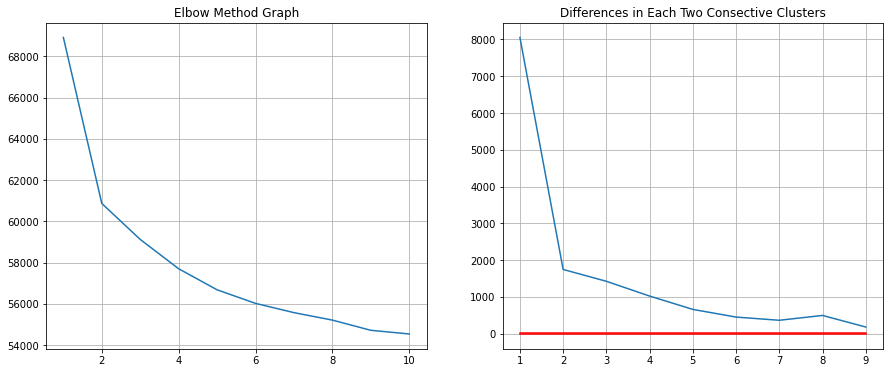

In [120]:
elbow_method.run(1, 10)
elbow_method.showPlot(boundary = 10)

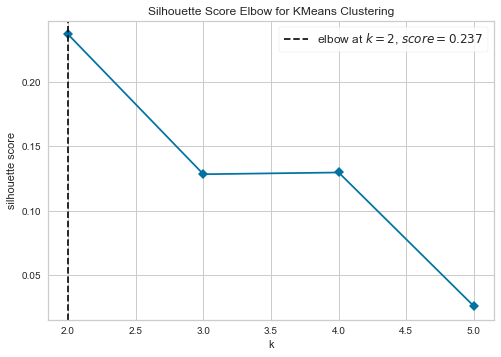

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [123]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(sparseMatrix)    
visualizer.poof()

In [124]:
kmeans = KMeans(n_clusters=2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 123)
clusters = kmeans.fit_predict(sparseMatrix)

In [125]:
print(kmeans.cluster_centers_)

[[ 3.28244275e-01  5.19083969e-02  4.06106870e-01 ...  1.47451495e-17
  -2.08166817e-17  1.30104261e-17]
 [ 7.01388889e-01  1.59722222e-01  7.29166667e-01 ...  2.43055556e-02
   2.77777778e-02  1.73611111e-02]]


In [126]:
print(kmeans.labels_)

[1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 

dataframe where we can see each user cluster number

In [139]:
users_cluster = pd.DataFrame(np.concatenate((users.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['user_id', 'Cluster'])
users_cluster

,user_id,Cluster
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
938,939,0
939,940,0
940,941,0
941,942,0


In [140]:
for i in range(2):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  655
Users in Cluster 1 ->  288


<function matplotlib.pyplot.show(close=None, block=None)>

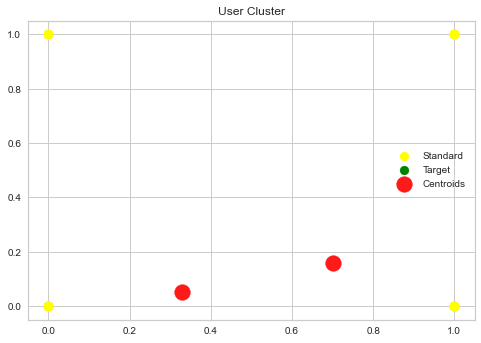

In [144]:
plt.scatter(sparseMatrix[kmeans.labels_==1,0],sparseMatrix[kmeans.labels_==1,1],s=80,c='yellow',label='Standard')
plt.scatter(sparseMatrix[kmeans.labels_==2,0],sparseMatrix[kmeans.labels_==2,1],s=80,c='green',label='Target')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = "o", alpha = 0.9,s=250,c='red',label='Centroids')
plt.title('User Cluster')
plt.legend()
plt.show

In [145]:
#Centroids
#centroids = kmeans.cluster_centers_
#cen_x = [i[0] for i in centroids] 
#cen_y = [i[1] for i in centroids]
## add to df
#users_cluster['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#users_cluster['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
#colors = ['#DF2020', '#81DF20', '#2095DF']
#df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

function which will create a list of DataFrames where each DataFrame will contain the movieId and the counts for that movie (count: the number of users who has that respective movie in their favorite list). So, the movie which will have more counts will be of more interest to other users who has not watched that movie yet.

In [148]:
def clustersMovies(users_cluster, users_data):
    clusters = list(users_cluster['Cluster'])
    each_cluster_movies = list()
    for i in range(len(np.unique(clusters))):
        users_list = list(users_cluster[users_cluster['Cluster'] == i]['user_id'])
        users_movies_list = list()
        for user in users_list:    
            users_movies_list.extend(list(users_data[users_data['user_id'] == user]['movie_id']))
        users_movies_counts = list()
        users_movies_counts.extend([[movie, users_movies_list.count(movie)] for movie in np.unique(users_movies_list)])
        each_cluster_movies.append(pd.DataFrame(users_movies_counts, columns=['movie_id', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_movies
cluster_movies = clustersMovies(users_cluster, users_fav_movies)

In [149]:
cluster_movies[1].T

,0,1,2,3,4,5,6,7,8,9,...,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487
movie_id,174,50,181,204,172,98,210,79,168,56,...,359,1412,1422,1122,894,1434,1436,901,666,1682
Count,265,263,243,242,242,234,226,222,218,216,...,1,1,1,1,1,1,1,1,1,1


In [151]:
cluster_movies[0].T

,0,1,2,3,4,5,6,7,8,9,...,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339
movie_id,258,50,300,286,288,100,294,181,313,1,...,1310,1311,728,726,1314,723,719,1322,1058,1679
Count,303,295,288,284,266,266,250,233,222,215,...,1,1,1,1,1,1,1,1,1,1


In [153]:
for i in range(2):
    len_users = users_cluster[users_cluster['Cluster'] == i].shape[0]
    print('Users in Cluster ' + str(i) + ' -> ', len_users) 

Users in Cluster 0 ->  655
Users in Cluster 1 ->  288


2. Considering a subset of users and discovering most rated genre. 

In [158]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = data_movies[data_movies['genre'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings_df[ratings_df['movie_id'].isin(genre_movies['movie_id'])].loc[:, ['user_id', 'rating']].groupby(['user_id'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

In [159]:
genre_ratings = get_genre_ratings(ratings_df, data_movies, ['Action', 'Horror'], ['avg_action_rating', 'avg_horror_rating'])
genre_ratings.head()

,avg_action_rating,avg_horror_rating
1,3.33,3.46
2,3.80,3.00
3,2.79,2.40
4,3.88,4.00
5,3.14,2.54


In [160]:
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_action_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_horror_rating'] > score_limit_2)) | ((genre_ratings['avg_horror_rating'] < score_limit_1) & (genre_ratings['avg_action_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [163]:
biased_dataset = bias_genre_rating_dataset(genre_ratings, 5, 3)

In [165]:
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  302


,index,avg_action_rating,avg_horror_rating
0,1,3.33,3.46
1,2,3.80,3.00
2,4,3.88,4.00
3,5,3.14,2.54
4,6,3.36,4.00


In [173]:
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg action rating')
    ax.set_ylabel('Avg Horror rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_action_rating'], clustered['avg_horror_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot

Creating two clusters : The grouping logic is how each user rated movies for two category.

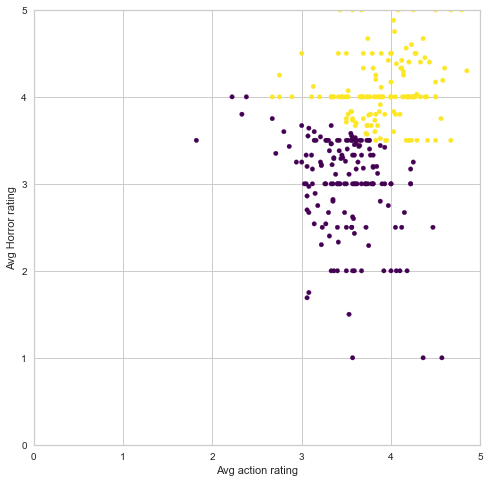

In [174]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_action_rating','avg_horror_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function

draw_clusters(biased_dataset, predictions)

User who like Horror but not Action are in Yellow group
User who like action but not horror are in purple. 

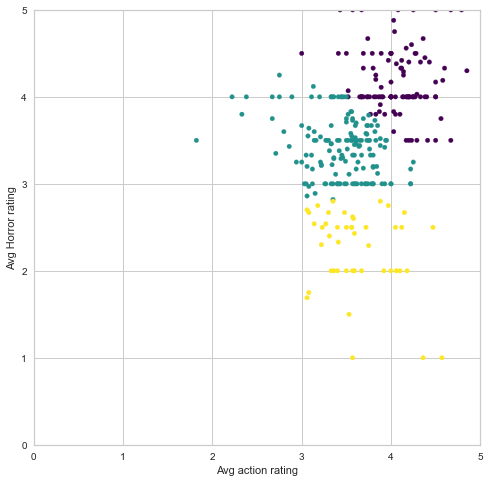

In [175]:
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions2 = kmeans_2.fit_predict(X)
# Defining the cluster plotting function

draw_clusters(biased_dataset, predictions2)

In [ ]:
User who like Action movie but not Horror movies are in yellow cluster
User who like Horror and Action are in purple cluster

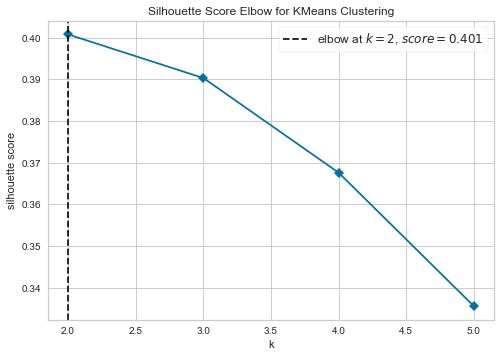

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [177]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)
# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

Below result will show how user Rated each movie

In [180]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings_df, data_movies[['movie_id', 'movie_title']], on='movie_id' )
user_movie_ratings = pd.pivot_table(ratings_title, index='user_id', columns= 'movie_title', values='rating')
# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (943, 1664) 

Subset example:


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)"
user_id,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN


Most of the user have not rated the movies. As there are lot of NULL value that is why this is a low-dense or sparse dataset.

sort the datsaset by the most rated movies and the users that have rated the most number of movies.

In [184]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

In [188]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

In [189]:
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [197]:
n_movies = 100
n_users = 50
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

most_rated_movies_users_selection

movie_title,Star Wars (1977),Contact (1997),Fargo (1996),Return of the Jedi (1983),Liar Liar (1997),"English Patient, The (1996)",Scream (1996),Toy Story (1995),Air Force One (1997),Independence Day (ID4) (1996),...,Apocalypse Now (1979),Courage Under Fire (1996),Top Gun (1986),"Lion King, The (1994)",Volcano (1997),To Kill a Mockingbird (1962),Babe (1995),Aladdin (1992),Murder at 1600 (1997),Mars Attacks! (1996)
415,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,...,NaN,5.0,4.0,4.0,2.0,5.0,5.0,3.0,3.0,2.0
12,5.0,4.0,5.0,5.0,2.0,3.0,1.0,3.0,1.0,5.0,...,5.0,1.0,5.0,4.0,3.0,5.0,4.0,5.0,3.0,2.0
449,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,5.0,3.0,NaN,5.0,NaN,3.0,4.0,3.0
275,5.0,5.0,5.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,...,5.0,4.0,3.0,4.0,3.0,5.0,4.0,5.0,3.0,4.0
177,5.0,4.0,4.0,5.0,2.0,3.0,5.0,4.0,5.0,5.0,...,3.0,4.0,5.0,4.0,3.0,5.0,4.0,5.0,3.0,1.0
377,4.0,4.0,4.0,4.0,2.0,5.0,3.0,4.0,4.0,4.0,...,3.0,3.0,4.0,4.0,NaN,NaN,4.0,4.0,NaN,4.0
591,5.0,5.0,5.0,3.0,3.0,5.0,5.0,4.0,NaN,4.0,...,5.0,4.0,NaN,4.0,2.0,5.0,5.0,4.0,1.0,3.0
302,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,1.0,3.0,...,NaN,NaN,5.0,3.0,1.0,4.0,5.0,5.0,NaN,4.0
292,5.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,...,5.0,3.0,2.0,4.0,2.0,4.0,3.0,NaN,2.0,3.0
536,4.0,4.0,4.0,2.0,1.0,3.0,2.0,2.0,1.0,1.0,...,4.0,3.0,NaN,NaN,1.0,4.0,NaN,1.0,1.0,1.0


As the data is dense we will use heatmap to visualize the high number of dimensions

In [218]:
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto', cmap = 'YlGnBu')
    
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User_id')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
    plt.show()

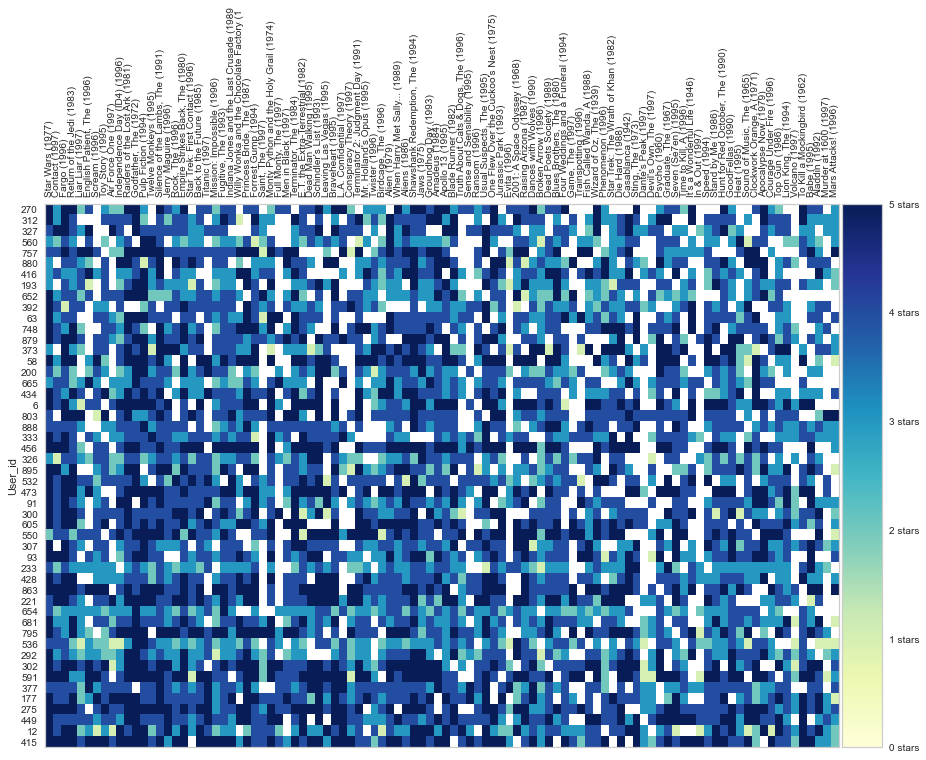

In [219]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
draw_movies_heatmap(most_rated_movies_users_selection)

Each columns are movies and rows are user. The darke the color more is the rating. 
Vertical lines with same color in a cluster represent more similar rating in that cluster.
Horizontal lines with same color represent user with low variety in there rating. 